# Project: Dynamic Fund Protection - Simulations and Pricing Methods

**By: Victor Felipe Gontijo - Quantitative research intern - BNP Paribas - Paris**

**Proposed by: Jean-Philippe Lemor - Head of systematic strategies and hybrids quantitative research team - BNP Paribas - Paris**

**July 2020**

## Dynamic Fund Protection

In this project, we aim to develop and extend some ideas presented in the paper:

*Junich Imai, Phelim P. Boyle, Dynamic fund protection. With a discussion by Hans U. Gerber and Elias S. W. Shiu (July, 2001)*

We develop here the main concepts involving a derivative product, named *Dynamic Fund Protection*. We intend, therefore, to properly define *Dynamic Fund Protections* as a class of financial products and, along with this definition, we also discuss some motivations around their most common uses and, present pricing methods for them. At a second moment, we develop and show some computational tools that allow us to numerically calculate prices for a *Dynamic Fund Protection*, as well as, to simulate its performance under different market outcomes.

## Context

In this day and age, when individuals and institutions get more and more access to information, they also tend to be increasingly concerned about their future, as well as, the choices they make, to effectively plan it. In this perspective, financial planning has become a major issue in today's societies and, individuals and institutions are more and more encouraged to look for financial solutions that meet their particular needs, aspirations, and future projects.

Finance is more than ever addressed with the problem to develop new custom-designed products, focused on dealing with different kinds of risk, time horizons, and expected returns. The product we present here, the *Dynamic Fund Protection*, was first introduced by: *Gerber and Shiu (1998, 1999)*. It was initially conceived for portfolios based in units/shares of investment funds and, designed to protect against downwards moves affecting the value of those units/shares.

Investment funds have been, for a long while, a great alternative, when it comes to getting exposition to financial investments. It makes investments much more accessible to general investors and, as a consequence, they reveal themselves as important means of collecting immense quantities of capital, which are immediately driven to reincorporate the economical activity and enhance the potential of the market. As an example, we may imagine the huge economical impact of the well-knowns American pension-funds.

Investment funds also serve as important tools to regroup several market actors that share the same investment strategies. It makes it much easier and effective to track an index or to invest in small-caps, for example. A fact is: each kind of fund has a very specific profile, which makes it sometimes hard for a particular investor to find a fund meeting exactly his requirements. In order to provide a solution for this issue, many insurance and banking companies have been looking at those requirements and developing more custom products.

Let's approach the "retirement-problem" and draw an example. This example will lead us to understand a context and a motivation for developing Dynamic Fund Protections.

One looking to make financial plannings on his retirement is someone who considers investing a part of his periodic income, from a long-term perspective. For sure, this person also expects those long-term returns to be certain and high enough to provide him when he no longer intends to work. 

For many years, those in such a position would surely look for pension-funds with conservative characteristics. As interest rates have become low, however, such returns have been no longer expected to be "high enough" and people looking for retirement options started shifting to funds with more risky characteristics. Well, with the risk factor as a contrast, the expected returns have become no longer "certain" as they were. 

## Motivation

A Dynamic Fund Protection is a financial product designed for someone who intends to limit potential losses against downwards moves that may eventually affect the value of his units of some investment fund. More than this, the product is also designed to allow such a person to profit, at any time, from the appreciation of the value of his units.

When we think about downside protection, it is very natural to think about Put Options. In the retirement example, European Put Options are even more natural to think, once people have usually a determined retirement date. Dynamic Fund Protection, as we may see, works as an extension of a European Put. 

Payoffs of European Put options are completely determined by the underlying's price at the maturity date. It implies that different underlying's paths, with equal prices at the maturity, will have the same payoff. This characteristic is sometimes not desirable and, Dynamic Fund Protections addresses a solution for it, making upside profits equally possible.

The following image shows the price evolution of units of an ETF, tracking the *S&P 500* index. Let's imagine a person who decided to make his own financial planning for retirement. For this purpose, this person buys some units of the following ETF, as a way of tracking the *S&P 500*, but the person also buys European Put Options with strike $K$, on the index options, as a form of downside protection.

<img src="files/Scenario1.png">

Evidently, neither would this person profit from his Put Option potential concerning downwards moves nor would he profit from the market's great recovery. As we may see later, a portfolio with units of the correspondent ETF and a Dynamic Fund Protection, having this ETF as underlying, is designed to be very performant in this scenario.

## The *Protected Portfolio*

Let $[0, T]$ be the interval in which we want to define a European derivative named Dynamic Fund Protection. Consider $T$ to be its maturity date and the only possible exercise date. 

Before defining this derivative, we will first explore a new concept: the *protected portfolio*. It can be interpreted as an alternative portfolio, sold by a financial institution, that makes it possible for an investor to have some degree of exposition to the fund, especially to upward moves, by simultaneously providing relevant protection from downward moves.

Let $I$ be the interval $[0,T]$, then consider two stochastic processes $S = \{S_t\}_{t \in I}$ and $F = \{F_t\}_{t \in I}$. For every $t \in I$, $S_t$ and $F_t$ are random variables defined over a same probability space $(\Omega ,{\mathcal {F}},P)$. 

Then, $S$ and $F$ represent the value of two different portfolios over time:

\begin{cases}
  \  S: \text{value of a portfolio composed by $1$ unit of the chosen investment fund.}
  \\ ~F: \text{value of the "protected portfolio".}
\end{cases}

Let $K$ be a function of time, defined over $[0,T]$. Intuitively, $K$ is intended to serve as a protection floor.

We would like to build the **protected portfolio**, such that, the following properties hold:

\begin{cases}
  \ .F_0 = \max(K_0, S_0)
  \\ ~ .\frac{dF_t}{F_t} = \frac{dS_t}{S_t} ~~~~~~~~~~~~~~~~ \text{if: }  \frac{dS_t}{S_t} \geq \frac{K_t}{F_{t-dt}} - 1
  \\ ~ .\frac{dF_t}{F_t} = \frac{K_t}{F_{t-dt}} - 1 ~~~~~~~~ \text{if: }  \frac{dS_t}{S_t} < \frac{K_t}{F_{t-dt}} - 1
\end{cases}

where the notation $dY_t$ means $Y_t - Y_{t-dt}$

Note that, for every interval of time $[t-dt, t]$, the quantity $\frac{K_t}{F_{t-dt}} - 1$ determines an acceptable lower bound for the instantaneous rate of return of $F$. We have thus introduced a variable lower bound designed to keep $F$ always above, or in the worst case, equal $K$.  

Whenever the instantaneous rate of return of $S$ is greater or equal than the lower bound, $F$ follows exactly the same dynamics of $S$. On the other hand, if that rate is lower than the lower bound, $F$ takes the lower bound to be its instantaneous rate of return.

**In practice**, the *protected portfolio* would be a portfolio sold by a bank, it does not have, however, to correspond to any real asset. Therefore, for a given interval $[0, T]$, a financial institution could construct the *protected portfolio* by **virtually** adding units of the chosen investment fund to a **theoretical portfolio**, whose value behaves exactly as we described above. 

This **practical construction** is described in the following procedure:

\begin{cases}
  \ .\text{Set $N_{0} = \max(1, K_0/S_0)$ and $F_0 = \max(K_0, S_0)$  } 
  \\ ~.\text{In every monitoring interval $[t-dt, t]$ , update $F_t$ and $N_t$, according to the following rule:} 
  \\ ~~~~ \text{Define: $\it{d}N_t := (K_t/S_t ~ - ~ N_{t~- ~ dt})^+$ }
  \\ ~~~~ \text{Set $N_t = N_{t-dt} + \it{d}N_t$}
  \\ ~~~~ \text{Set $F_t = N_tS_t$}
\end{cases}

The *practical construction* provided above shows that: at any instant $t \in [0, T]$, **the value of the protected portfolio is exactly the value of $N_t$ units of the chosen fund, quoted at $t$**. 

The reader should also note that: in each monitoring interval, either the financial institution *virtually* adds more units to the *theoretical portfolio* or, they keep exactly the same number of units. This behavior is determined by the *protective character* of the product: **once the units' value gets very depreciated and tends to drastically decrease the value of the portfolio, more units are added to compensate their individual depreciation**.

The *practical construction* we have discussed gives a very natural interpretation to the protected portfolio and, as it will become more evident when we discuss the payment of dividends, the word **virtually** is really important here. It basically means that the *theoretical portfolio* does not exist in practice and the bank does not buy any unit in the real world. Along with all the life of the product, the bank would just keep track of how many units the would have *virtually* bought so far and, then determine the value of the protected portfolio as a function of the number of virtual units.

Although those properties above can be intuitively understood and help us capture the main idea of the *protected portfolio* we want to build, they are not mathematically precise. We mean "not precise", in the sense that: $dt$, in this case, is not mathematically defined. For this reason, we will choose an elegant, broader, and simpler definition:

The **protected portfolio** is defined as portfolio whose value at any instant $t\in [0,T]$ is given by:

\begin{equation*}
\ F_t = S_t\max(1, \max\limits_{s \in [0,t]}\frac{K_s}{S_s} )
\label{eq:def_continuous} \tag{1.0}
\end{equation*}

The processes $S$ and $F$ may also be defined only over a finite discrete set of *monitoring points*: $H \subseteq [0,T]$. In this case we use following definition for the **protected portfolio**:

\begin{equation*}
\ F_k = S_k\max(1, \max\limits_{i\leq k: ~ i \in H}\frac{K_i}{S_i} )
\label{eq:def_discrete} \tag{1.1}
\end{equation*}

for any instant $t\in H$.

We invite the reader to play with these last definitions and convince himself that they do correspond to the first two definitions. We also invite the reader to imagine how a *protected portfolio* would perform in the scenario of the first picture.

## The Unit Value as a Stochatic Process $S$

We have defined $S$ as a general stochastic process over $[0,T]$. For the purposes of the theory and the applications we intend to develop in this project, we investigate Dynamic Fund Protections under the assumption that $S$ is an one-dimension difusion process, satisfying the following Stochastic Differential Equation:

\begin{equation*}
\ \frac{\it{dS_t}}{S_t} = (\mu_t - q_t)\it{dt} + \sigma_t\it{dW_t}
\label{eq:risky_dynamics} \tag{2}
\end{equation*}

We will also consider the filtration $\{\mathcal {F_t}\}_{t \in I}$ generated by the Brownian Motion. The variables $\mu$, $q$ and, $\sigma$ are $\mathcal {F_t}$-adapted, and, so is $S_t$, as a consequence.

In our context, $S$ represents the value of a single unit of the chosen fund. We suppose that this unit pays dividends continuously, according to its instantaneous dividend yield $q_t$. In this case, $\mu_t$ represents the expected instantaneous rate of return of the unit value plus reinvested dividend gains. $\sigma_t$ represents the instantaneous volatility, intrinsic to the unit's value.

In the real world, we can see two different kinds of behaviors concerning dividends payment by investment funds. Some funds prefer to reinvest the dividends, which contributes to their units to have a greater value and, other funds prefer to pay dividends to the unitholders. The first case necessarily correspond to $q = 0$ as the second one to $q \geq 0$.

The dividends payment is one of the main reasons we emphasized the word **virtually** when providing construction for the *protected portfolio*. If the chosen fund is such a fund whose units have $q > 0$, then any investor holding any amount of units in the real world would receive dividends payment. On the other hand, the value of *protected portfolio* would not account for those dividends, once its value is *theoretically* linked only to the value of the units. This discussion gets even more important when dealing with *American Dynamic Fund Protections*, which we will not discuss in this project.


**Note**:
The reader should note, for example, that the stochastic differential equation above only have a mathematical sense when regarded as an integral equation:

$\it{dS_t} = b(t,S_t)\it{dt} + a(t,S_t)\it{dW_t}$ means $S$ is a stochastic process that satifies : $S_{t+u} - S_t = \int_t^{t+u}b(v,S_v)\it{dv} + \int_t^{t+u}a(v,S_v)\it{dW_v}$ over some considered domain.

Let $t,u \in I$. The integrals above are well-defined and have the following meanings:

For each $\omega \in \Omega$, we have a map $M_\omega$ from $[t, t+u]$ to $\mathbb{R}$, such that, $M_\omega: v \mapsto b(v,S_v)(\omega)$. If $M_\omega$ is continuous almost everywhere, so $\int_t^{t+u}b(v,S_v)(\omega)\it{dv}$ is a well-defined Riemman-Integral. In this case where the integral is defined for every $\omega \in \Omega$, hence $\int_t^{t+u}b(v,S_v)\it{dv}$ is constructed "path-wise". 

If $a(v,S_v)$ is adapted to the filtration generated by the Brownian Motion and it belongs to $L^2(\Omega \times [0,T])$, thus $\int_t^{t+u}a(v,S_v)\it{dW_v}$ is a well-defined Ito's integral, with respect to the Brownian Motion. The integral $\int_t^{t+u}a(v,S_v)\it{dW_v}$ is a random variable over $(\Omega ,{\mathcal {F}},P)$, but is defined as a $L^2$ limit, rather than "path-wise" like the first one. 

## Simulations of $F$ and $S$ (supposed to be log-normal)

In order to gain some intuition about the *protected portfolio* we have just defined, we will play some simulations, so we can see how it is expected to behave in different market outcomes.

For the first group of simulations, we consider $K$ being a constant function of time and we also consider $S$ following a Geometric Brownian Motion. This means equation 2.0 gets reduced to the simpler case in which $\mu_t \equiv \mu$, $q_t \equiv q$ and, $\sigma_t \equiv \sigma$, with $\mu$, $q$ and, $\sigma$ constants.

This is the simplest case we could treat, and that's why we start with it. In sequence, we will develop a pricing method for a Dynamic Fund Protection under these conditions, and then, we will progressively consider more complex cases.

### General Parameters of the Investment

In [1]:
#Investment Horizont - Years
years = 5

#Initial value of a single unit
S_0 = 20

### Protected Portfolio Parameters

In [2]:
# K  -(constant barrier)
K = 20

# Number of times per day the portfolio is monitored 
checks_per_day = 10

In [3]:
# Code parameters
import numpy as np

dt = 1/(365*checks_per_day)
size = int(years/dt) + 1
checking_instants = np.array(range(0,size))*dt

### Model Parameters - Geometric Brownian Motion

In [4]:
# Drift
mu = -0.10

# Dividend Yield
q = 0.05

# Volatility
sigma = 0.2

In [5]:
#### Importing file "Dynamic_Fund_Protection.py"

In [6]:
from Plot import plot
from Plot import plot_superimpose
from Protected_Portfolio import Geometric_Brownian_Motion
from Protected_Portfolio import Gen_K
from Protected_Portfolio import Gen_F
from Protected_Portfolio import Gen_F2

### Simulating a Geometric Brownian Motion path of $S$, over the chosen period

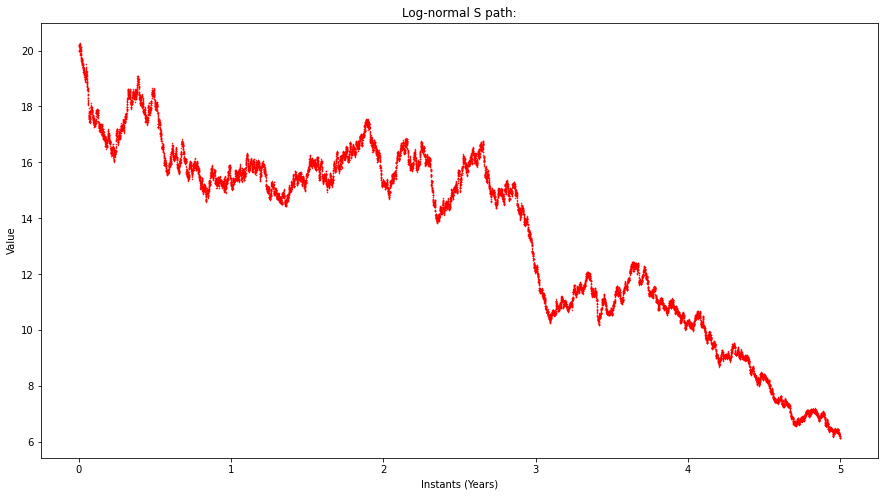

In [7]:
S = Geometric_Brownian_Motion(S_0, mu - q, sigma, checking_instants)
plot('Log-normal S path:', S, dt, 'red')

### Determining the correspondent path of $F$, with respect to the simulated path of $S$, over the chosen period

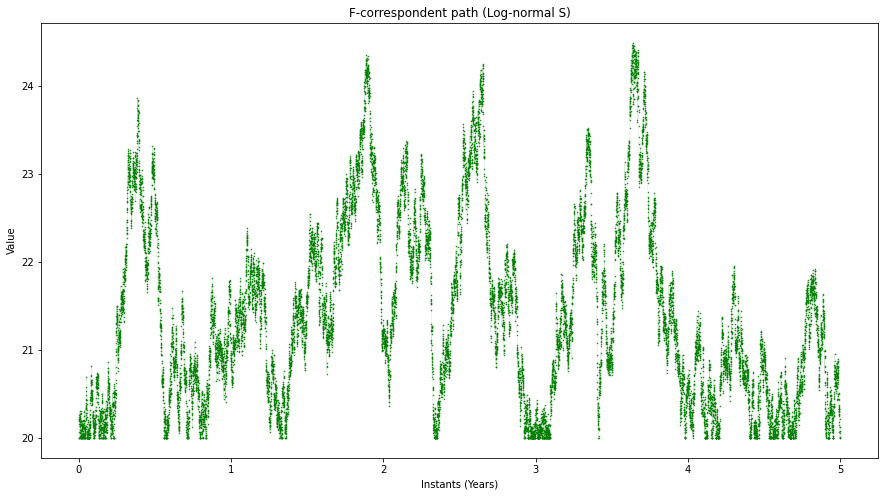

In [8]:
K_floor = Gen_K(K, checking_instants)
F = Gen_F(S,K)

plot('F-correspondent path (Log-normal S)', F, dt, 'green')

### Comparison between $S$ and the *protected portfolio* $F$, over the chosen period

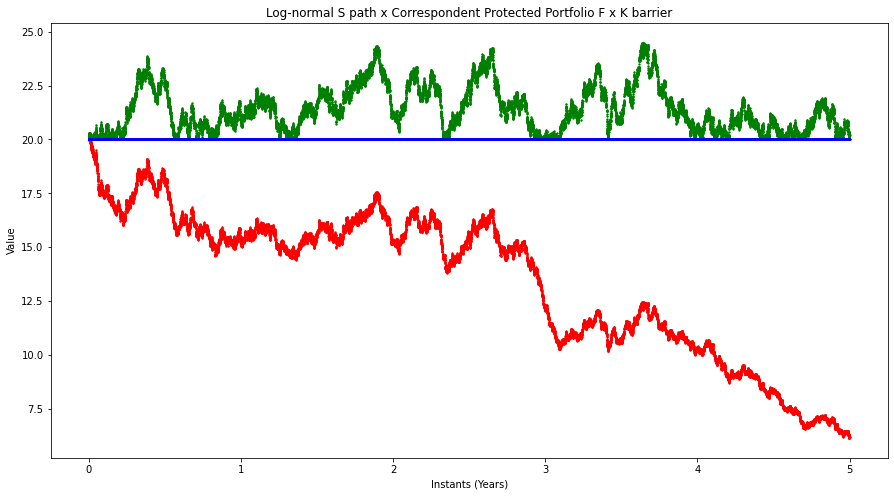

In [9]:
plot_superimpose('Log-normal S path x Correspondent Protected Portfolio F x K barrier', S , F, K_floor, dt)

In [10]:
l = len(S)
print('Absolute difference in the final values between the "protected" and "non-protected" portfolio: ' + str(F[l-1] - S[l-1]))
print('Relative difference in the final values between the "protected" and "non-protected" portfolio: ' + str((F[l-1] - S[l-1])/S[l-1]))

Absolute difference in the final values between the "protected" and "non-protected" portfolio: 14.009012422299357
Relative difference in the final values between the "protected" and "non-protected" portfolio: 2.2552317781447933


## Dynamic Fund Protections

We define now an European derivative named Dynamic Fund Protection. This derivative has the unit $S$ as its underlying asset and $T$ as its maturity.

So far, we have discussed the processes $S$ and $F$. Indeed, the Dynamic is defined to be an European derivative that, at the maturity $T$, has the following payoff: 

\begin{equation*}
\ \text{DFP}(T,S_T) = F_T - S_T
\label{WQ_def} \tag{3}
\end{equation*}

As $S_T > 0$, it is a financial product considerably cheaper and more attractive in comparison with the price of a protected portfolio. The Dynamic Fund Protection can be interpreted as a European derivative that pays off the value quoted in $T$ of all units virtually added, between $(0, T]$, to the protected portfolio.

## Pricing Dynamic Fund Protections

In order to price Dynamic Fund Protections, that is, to determine a premium for which a bank or any other seller should be willing to sell a Dynamic Fund Protection, we will use the concepts of no-arbitrage pricing and, neutral risk valuation.

We first develop the theoretical framework of Neutral Risk Valuation for general derivatives, and then, we apply these ideas specifically to Dynamic Fund Protections. 

   ### Neutral Risk Valuation - General Framework for European Derivatives

#### First Assumptions

Let $V = \{V_t\}_{t \in I}$ be a stochastic process defined in $I$, representing the value of a general European derivative of $S$ over that period. The payoff generated by this derivative depends on the particular path followed by $S$. By the no-arbitrage principle, at the maturity date $T$, $V_T$ is necessarily equal to the payoff of the derivative. 

Let $r = \{r_t\}_{t \in I}$ be a stochastic process defined $I$, representing the instantaneous spot interest rate over that period. That is the interest rate used in a money market account.

$V$ and $r$ are defined over $(\Omega ,{\mathcal {F}},P)$ and considered $\{\mathcal {F_t}\}_{t \in I}$-adapted.

Let $\Delta = \{\Delta_t\}_{t \in I}$ be a $\{\mathcal {F_t}\}_{t \in I}$-adapted stochastic process. From this process $\Delta$ we will create a very particular portfolio, named *Delta-Portfolio* with the following caracteristics:

\begin{cases}
  \   .\text{The Delta-Portfolio is fully exposed to $S$ and a money market account.}
  \\ ~.\text{The Delta-Portfolio starts with an initial capital $X_0$, which is immediately allocated in the assets above.} 
  \\ ~.\text{The Delta-Portfolio is a self-financing portfolio}
  \\ ~.\text{At the instant $t$, the Delta-Portfolio always holds $\Delta_t$ shares of $S$.}
\end{cases}

The third property says that: if $X_t$ is the value of the Delta-portfolio at the instant $t$, the portfolio would possibly allow any composition between the value allocated in $S$ and the value allocated in the money market, such that they sum to $X_t$. The fourth property requires however a very particular composition: $\Delta_t$ shares of $S$ and $X_t - \Delta_tS_t$ is borrowed/invested in the money-market account. 

We will now require the Delta-Portfolio, at any instant $t \in I$, to be a perfect hedge for a short position taken in the derivative, at this same instant $t$. In other words, we will require such a Delta-Portfolio started at the instant $t$ to exactly replicate the payoff $V_T$ of the European derivative.

In fact, it is not evident at all that such a Delta-Portfolio, satisfying this last requirement, does exist. Under some sufficiently general conditions, the *Martingale Representation Theorem* can be used to prove its existence. Alternatively, by supposing the existence and the regularity of the Delta-Portfolio, we often show it must satisfy a particular Partial Differential Equation, therefore, by finding a solution particular solution for the PDE, with the appropriated boundary conditions, we can also prove its existence. 

Assuming the existence of such a process $\Delta$, in a way that its related Delta-Portfolio satisfies the hedging requirement, then: the hedging relation between Delta-Portfolio and the European derivative and the no-arbitrage principle imply:

\begin{equation*}
\ \it{dV_t} = \Delta_t \it{dS_t} + \Delta_tq_tS_t\it{dt} + r_t(V_t - \Delta_tS_t)\it{dt}
\tag{3}
\end{equation*}

The left side represents the change in the value of the European derivative and the right side represents the change in the value of the Delta-Portfolio. During an interval of time $dt$, the value of the Delta-Portfolio is affected by the change on $S$, by the dividends received/paid, and by the evolution of the money-market account.

#### The Discounted Value of S  and V

In order to determine the dynamics of $V$, we proceed by substituting equation (2) in equation (3), which gives us:

\begin{equation*}
\ \frac{\it{dV_t}}{V_t} = r_t\it{dt} + \Delta_t\frac{S_t}{V_t}\sigma_t[\Theta_t\it{dt} + \it{dW_t}] 
\tag{4.0}
\end{equation*}

where $\Theta$ is another process called *risk premium process*, defined by:

\begin{equation*}
\ \Theta_t := \frac{\mu_t - r_t}{\sigma_t} 
\label{theta_def} 
\end{equation*}

Let $D = \{D_t\}_{t \in I}$ be a stochastic process defined in $I$, representing the discounting factor between $0$ and $t\in I$.

$$\ D_t := exp( -\int_0^{t}r_u\it{du} ) $$ 

At the instant $t\in I$, the discounted value of $S$ and $V$ are respectively is $D_tS_t$ and $D_tV_t$. In this context, we are interested to express the dynamics of these discounted processes. 

Equations (2) and (4.0) give us the dynamics of $S$ and $V$. From those two equations, we can express $S$ and $V$ as Doleans-Dade exponentials. Thus, the products $D_tS_t$ and $D_tV_t$ are easily obtained in an exponential form. 

By applying the Itô's lemma to $log(D_tS_t)$ and $log(D_tV_t)$,we can deduce the following dynamics under the probablity space $(\Omega ,{\mathcal {F}},\mathbb{P})$:

\begin{cases}
  \   \it{d}(D_tS_t) = - ~ q_t(D_tS_t)\it{dt} + \sigma_t(D_tS_t)[\Theta_t\it{dt} + \it{dW_t}]
  \\ ~\it{d}(D_tV_t) = \Delta_t(D_tS_t)\sigma_t[\Theta_t\it{dt} + \it{dW_t}]
\tag{4.1}  
\end{cases}


#### Change of Measure - Girsanov's Theorem

We will now define a new stochastic process $Z = \{Z_t\}_{t \in I}$, which will be used to construct a new probability measure $\mathbb{Q}$ over $\mathcal {F}$, equivalent to $\mathbb{P}$:

\begin{equation*}
\ Z_t := exp(-\int_0^t \Theta_u\it{dW_u} - \frac{1}{2}\int_0^t \Theta_u^2\it{du}) 
\label{Z_def} 
\end{equation*}

Under the assumption that the process $\Theta$ satisfies the Novikov's condition, that is: $\mathbb{E}[exp ( \frac{1}{2}\int_0^t \Theta_u^2\it{du})$$]$ $< \infty$ :

The Girsanov Theorem asserts that $Z$ is a martingale under the measure $\mathbb{P}$. In particular, it ensures that: $\mathbb{E}[Z_T] = Z_0 = 1$.

This allows us to construct a new measure $\mathbb{Q}$, such that: $\frac{\it{d}\mathbb{Q}}{\it{d}\mathbb{P}} = Z_T$, where $\frac{\it{d}\mathbb{Q}}{\it{d}\mathbb{P}}$ is a Radon-Nikodym derivative. $Z_T$ is also a positive random variable, which implies $\mathbb{Q}$ and $\mathbb{P}$ are equivalent mesures over $\mathcal {F}$.

The Girsanov Theorem states that the process $W^\mathbb{Q}$, defined below, is a is a Brownian Motion under the measure $W^\mathbb{Q}$:

\begin{equation*}
\ W_t^\mathbb{Q} := W_t + \int_0^t \Theta_u \it{du}
\tag{5.0}
\end{equation*}

Well, this is a game-changing result. When applied to equation (4.1) it gives the dynamics of the discounted value of $S$ and $V$, under the new mesure $\mathbb{Q}$:

\begin{cases}
  \   \it{d}(D_tS_t) = - ~ q_t(D_tS_t)\it{dt} + \sigma_t(D_tS_t)\it{d}W_t^\mathbb{Q}
  \\ ~\it{d}(D_tV_t) = \Delta_t(D_tS_t)\sigma_t\it{d}W_t^\mathbb{Q}
\tag{5.1}  
\end{cases}

Acording to these new dynamics, $DV$ is a martingale under the measure $\mathbb{Q}$, which we call **neutral-risk measure**. The martingale property ensures that:

\begin{equation*}
\ D_tV_t = \mathbb{E}^Q [D_T V_T | \mathcal{F}_t] 
\tag{5.2}
\end{equation*}

In particular, 

\begin{equation*}
\ V_0 = \mathbb{E}^Q [exp( -\int_0^{T}r_u\it{du} )V_T ] 
\tag{5.3}
\end{equation*}

noting that $V_T$ is equal to the payoff at the maturity date.

### Pricing of Dynamic Fund Protections under the Black-Scholes Framework 

In the last section, we have underlined the main ideas concerning the principles of no-arbitrage pricing and neutral-risk valuation. It has been done under the framework of a general diffusion process with stochastic interest rates.

Here we apply those ideas in the classical framework of Black-Scholes. In this context, $S$ is supposed to follow a Geometric Brownian Motion and we have a constant interest rate $r$ and a constant dividend yield $q$. 

In our approach, we only consider the simplest case, in which $K$ is a constant and pre-determined barrier, but this approach can be also generalized for more complex kinds of barriers.  

#### Rewriting the Payoff

Let $\{M_t\}_{t \in I}$ be a processus $\{\mathcal {F_t}\}_{t \in I}$-adapted, defined as:

\begin{equation*}
\ M_t = \max(1, \frac{K}{\min\limits_{s \in [0,t]} S_s} )
\label{eq:def_M} 
\end{equation*}

This definition allows us to rewrite equation (1.0). For any $t \in I$, we can observe $S$ before and after $t$. More than this, $F_T$ can be determined by comparing the observed results in each one of these two different intervals:

\begin{equation*}
\ F_T = S_T\max(M_t, \frac{K}{\min\limits_{s \in [t,T]} S_s} )
\label{eq:FT_rewriting} 
\end{equation*}

We can rewrite this equation, one more time. Making this comparison still more evident:

\begin{equation*}
\ F_T = S_TM_t +  S_T(\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+
\label{eq:FT_rewriting2} 
\end{equation*}

Let $X = \{X_t\}_{t \in I}$ be the stochastic process defined $I$, representing the value of such a Dynamic Fund Protection, with underlying $S$ and maturity $T$. We use the last equation to write the payoff $X_T$ of the Dynamic Fund Protection, only in function of $S$:

\begin{equation*}
\ X_T = S_T\{M_t - 1 + (\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+ \}
\tag{6}
\end{equation*}

As $M_t$ is $\mathcal {F_t}$-measurable, for any $t \in I$, the last equation shows exactly how the payoff $X_T$ is affected in terms of known information, represented by $\mathcal {F_t}$, and the future information, that we still do not know.

**Note:** If we consider the case of a Dynamic Fund Protection discretely monitored, the results obtained so far are pretty much the same.

#### Change of Numéraire and Construction of a New Martingale Measure

By hypothesis, the instantaneous spot interest rate $r$ is constant and $S$ follows log-normal dynamics under the  real-world measure $\mathbb{P}$: 

$$\it{dS_t} = (\mu - q) S_t\it{dt} + \sigma S_t\it{dW_t}$$

An idea one could naturally have is to look at the Neutral-Risk Measure $\mathbb{Q}$, under which, the discounted value $DV$ of a European derivative is a martingale. This is what we have proposed in the general framework of neutral-risk valuation and, for the log-normal dynamics, in particular, one can prove all the necessary hypotheses (existence of $\Delta$ and Novikov's Condition) are indeed satisfied. This guarantees the construction of $\mathbb{Q}$ which implies a particular version of equation (5.2):

\begin{equation*}
\ X_t = e^{-r(T-t)}\mathbb{E}^Q [X_T | \mathcal{F}_t]
\tag{7.0}
\end{equation*}

We also know $S$ follows the following dynamics under the Neutral-Risk Measure $\mathbb{Q}$:

$$\it{dS_t} = (r - q )S_t\it{dt} + \sigma S_t\it{d}W_t^\mathbb{Q}$$

When one tries to plug equation (6) inside the conditional expectation of equation (7.0), one gets a non-trivial expectation to calculate analytically. One should also note that: the payoff $X_T$ is, in fact, $S_T$ multiplied by a random factor. This suggests we should maybe use $S$ as a numéraire to express the values of the Dynamic Fund Protection over time.

Following this intuition, we will use a similar idea to the one we used on the general neutral-risk approach. We will look, therefore, for a measure $\mathbb{Q}_s$, under which, the relative price of $X$, with respect to $S$, is a martingale. 

This procedure should allow us to determine $X_t$ in terms of a new conditional expectation under $\mathbb{Q}_s$, thus we expect this new expectation to be easier to deal with. This technique is known as "change of numéraire".

We will now define a new stochastic process $G = \{G_t\}_{t \in I}$, which will be used to construct a new probability measure $\mathbb{Q}_s$ over $\mathcal {F}$, equivalent to $\mathbb{Q}$:

$$ G_t := exp(\sigma W_t^\mathbb{Q} - \frac{1}{2}\sigma^2t) = \frac{S_t}{e^{(r - q)t}S_0}$$

Note that, $G$ is always positive and $G$ is also a martingale over $\mathbb{Q}$. This immediately implies that $\mathbb{E}^{\mathbb{Q}} [G_T] = 1$. 

In this context, we define $\mathbb{Q}_s$ such that:

$$\frac{\it{d}\mathbb{Q}_s}{\it{d}\mathbb{Q}} = G_T$$

where $\frac{\it{d}\mathbb{Q}_s}{\it{d}\mathbb{Q}}$ is a Radon-Nikodym derivative.

Let $t,u \in I$ such that: $t < u$. Let Y be some $\mathcal{F}_u$-measurable random variable. The definitions of $\mathbb{Q}_s$ and $G$, as well as, the latter's martingale property imply the following equality:

$$ \mathbb{E}^{Q_s}[ Y | \mathcal{F}_t] = \frac{1}{G_t}\mathbb{E}^{Q}[ YG_u | \mathcal{F}_t] $$

Well, by combining this last equality with equation (7.0) and the expression $G_t = \frac{e^{qt}S_t}{e^{rt}S_0}$, we can  can easily show that $\frac{X_t}{e^{qt}S_t}$ is a martingale under the new measure $\mathbb{Q}_s$. This gives us a pricing formula for the Dynamic Fund Protection:

\begin{equation*}
\ X_t = e^{-q(T - t)}S_t\mathbb{E}^{Q_s} [\frac{X_T}{S_T} | \mathcal{F}_t]
\tag{7.1}
\end{equation*}

By the Girsanov's Theorem, we know that the process $W_t^{\mathbb{Q}_s} := W_t^\mathbb{Q} - \sigma t$ is a Brownian Motion under the the measure $\mathbb{Q}_s$. It implies that $S$ has the following dynamics under the new measure:

\begin{equation*}
\ \it{dS_t} = (r - q + \sigma^2)S_t\it{dt} + \sigma S_t\it{d}W_t^{\mathbb{Q}_s}
\tag{7.2}
\end{equation*}

**Note:** Again, if we consider the case of a Dynamic Fund Protection discretely monitored, the results obtained so far are pretty much the same.

#### Continuous Monitoring - Analytic Solution

In order to derive an analytic solution for the "pricing-problem" of a Dynamic Fund Protection, under the Black-Scholes framework, one needs to express $\mathbb{E}^{Q_s} [\frac{X_T}{S_T} | \mathcal{F}_t]$ with some analytical formula. In more complex frameworks, that is not an easy task and, most times we cannot even be sure if it is possible. 

Fortunately, under the Black-Scholes framework, we can derive an analytic solution for Dynamic Fund Protections continuously monitored. Of course, such products cannot exist in practice, once the units of a fund cannot be continuously quoted. From the Mathematical perspective, however, such idealization allows use to use some powerful results of the theory of stochastic processes over continuous time, such as the distribution of the minimum value of a Geometric Brownian Motion, over a given interval. 

By pluging equation (6) in equation (7.1) we obtain:

\begin{equation*}
\ X_t = e^{-q(T - t)}S_t\{ M_t - 1 + \mathbb{E}^{Q_s} [(\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+  | \mathcal{F}_t]\}
\tag{8.0}
\end{equation*}

This leaves with the challenge to calculate $\mathbb{E}^{Q_s} [(\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+  | \mathcal{F}_t]$. Note we can split this expectation into two simpler expectations:

$$ \mathbb{E}^{Q_s} [(\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+  | \mathcal{F}_t] = \mathbb{E}^{Q_s}[\frac{K}{\min\limits_{s \in [t,T]} S_s} \mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}}  | \mathcal{F}_t] - M_t\mathbb{E}^{Q_s} [\mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}} | \mathcal{F}_t]$$

where $\mathbb{1}_{\{A\}}(\omega)$ is the indicator function. It values $1$ if $\omega \in A$ and $0$ otherwise.

Let $\mu^* := r - q + \frac{\sigma^2}{2}$ and $\tau := T-t$. 

Let  $F(x) = \mathbb{Q}_s (\min\limits_{s \in [t,T]}S_s \leq x   | S_t )$ be the cumulative distribuition function of $\min\limits_{s \in [t,T]} S_s$ under $\mathbb{Q}_s$. This function is given$^{[1]}$ by:

\begin{equation*}
 F(x) = \Phi(\frac{-\mu^*\tau + log(\frac{x}{S_t})}{\sigma \sqrt{\tau}}) + (\frac{S_t}{x})^{\frac{-2\mu^*}{\sigma^2}}\Phi(\frac{\mu^*\tau + log(\frac{x}{S_t})}{\sigma \sqrt{\tau}})
\tag{8.1}
\end{equation*}

defined for $0 < x \leq S_t$.

Note that the second expectation is straightfoward from the definition of the CDF:
$$\mathbb{E}^{Q_s} [\mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}} | \mathcal{F}_t] = \mathbb{Q}_s (\min\limits_{s \in [t,T]}S_s \leq \frac{K}{M_t} | S_t ) = F(\frac{K}{M_t})$$

By definition of $M$, it is clear that $M_t \geq \frac{K}{S_t}$, which implies that: $\frac{K}{M_t}$ is inside the domain of $F$.

F(x) is differentiable over its domain of definition. We will call $F'$ its derivative, which is, in fact, the density of the $\min\limits_{s \in [t,T]} S_s$ distribution. Hence, the first expectation can be expressed as:

$$ \mathbb{E}^{Q_s}[\frac{K}{\min\limits_{s \in [t,T]} S_s} \mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}}  | \mathcal{F}_t] = \int_{0}^{\frac{K}{M_t}} F'(x)\frac{K}{x} \it{dx} $$

Integrating by parts we have:

$$ \mathbb{E}^{Q_s}[\frac{K}{\min\limits_{s \in [t,T]} S_s} \mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}}  | \mathcal{F}_t] = M_tF(\frac{K}{M_t}) + \int_{0}^{\frac{K}{M_t}} KF(x)\frac{1}{x^2} \it{dx}$$

Recombining the expressions we obtained for the two expectations in terms of $F$, we have the following expression for the price of a Dynamic Fund Protection, under a log-normal underlying:

\begin{equation*}
 X_t = e^{-q(T - t)}S_t \{ M_t - 1 + \int_{0}^{\frac{K}{M_t}} F(x)\frac{1}{x^2} \it{dx} \}
\tag{8.2}
\end{equation*}

The integral $\int_{0}^{\frac{K}{M_t}} F(x)\frac{1}{x^2} \it{dx}$ can be calculated using the substitution $x = S_te^v$ and then integrating by parts. The following result is extremelly useful for the calculation: 

$$\int_{-\infty}^b \Phi(c_1 + c_2v)e^{-c_3v} \it{dv} = \frac{1}{c_3}[\Phi(\gamma + c_2b)e^{\frac{1}{2}(\gamma^2 - \, c_1^2)} - \, \Phi(c_1 + c_2b)e^{-\, c_3b}]$$

with: $\gamma := c_1 + \frac{c_3}{c_2}$

*Junich Imai and Phelim P. Boyle* present in their paper an elegant final formula, that correspond to equation (8.2), after calculating the integral, as we sugested:

\begin{equation*}
\ X_t = e^{-q(T - t)}\{S_t[M_t\Phi(d_1) - 1] + \frac{K}{R}\Phi(d_2)(\frac{K}{M_tS_t})^R + K(1 - \frac{1}{R})\Phi(d_3)e^{(r-q)\tau}\}
\tag{8.3}
\end{equation*}

Where:

\begin{cases}
  \  R:= \frac{2(r-q)}{\sigma^2}
  \\ d_1 := \frac{ -log(\frac{K}{M_tS_t}) ~ + ~ (r-q)\tau + \frac{1}{2}\sigma^2\tau }{\sigma\sqrt{\tau}}
  \\ d_2 := \frac{ log(\frac{K}{M_tS_t}) ~ + ~(r-q)\tau + \frac{1}{2}\sigma^2\tau }{\sigma\sqrt{\tau}}
  \\ d_3 := \frac{ log(\frac{K}{M_tS_t}) ~ - ~ (r-q)\tau + \frac{1}{2}\sigma^2\tau }{\sigma\sqrt{\tau}}
\end{cases}

**Note:**
[1]: A proof for equation (8.2) can be found at: https://www.ntu.edu.sg/home/nprivault/MA5182/maximum-brownian-motion.pdf, page 357, equation (10.15). The formula is obtained by removing the drift of the related Brownian Motion (change of measure) and using the results for the maximum/minimum of a standard Brownian Motion, which are themselves obtained from the "reflection principle".

#### Continuous Monitoring - Monte Carlo Solution

When dealing with expectations such as $\mathbb{E}^Q [X_T | \mathcal{F}_t]$, Monte-Carlo methods are definitely one of the most popular approaches. In the case of Dynamic Fund Protections continuously monitored, the application of Monte-Carlo methods deserves, indeed, particular attention.

When we look to equation (6), when can note that the payoff of a Dynamic Fund Protection carries some similarities with the payoff of European Lookback call options with a floating strike. In both cases, the payoff depends both on the final underlying's price and its minimum value along the monitoring period. In the case of continuous monitoring, the monitoring times are points of an interval.

Choose any possible finite discretization of the interval $[0,T]$. Now consider a sample path of $S$, that is: $\{S_t(\omega)\}_{t \in [0,T]}$, for a given $\omega \in \Omega$. Once $\{S_t(\omega)\}_{t \in [0,T]}$ is a continue path defined over the compact $[0,T]$, we know its minimum is attained at some $t^*(\omega) \in [0,T]$.  

In fact, $t^*$ is a random variable, which means we can look at its distribution throughout the interval $[0, T]$. In this sense, let's analyze the following question:

For a given finite discretization of [0, T], what is the probability of $t^*$ belonging to one of its points? 

Well, since finite countable sets have 0 lengths with respect to the Lebesgue measure, it means, any possible finite discretization will almost surely miss the true minimum of the process. 

It means that, for each single sample path we want to simulate, a traditional Monte-Carlo method would almost surely miscalculate the true value of $X_T$. As such a Monte-Carlo method works by determining the empirical mean of $X_T$, for several different simulated paths, we also should expect this empirical mean to be a miscalculation of $\mathbb{E}^{Q_s} [X_T | \mathcal{F}_t]$, no matter what discretization is chosen.

In fact, this is a common difficulty when dealing with Monte-Carlo simulations intended to price "path-dependent" derivatives. Barrier options, Lookback options, and Dynamic Fund Protections are such an example. In the Black-Scholes framework, however, we have an elegant and very precise solution, which reveals itself also really fast. 

The following algorithm is used to evaluate $X_t$ in equation (7.0). It could be equally used to evaluate the $X_t$ in equation (8.0), we would just need to regard $S$ with respect to the measure $\mathbb{Q}_s$. We show below the steps of this adapted Monte-Carlos algorithm, which we will call **Brownian-Brigde Monte-Carlo**:

\begin{cases}
  \text{Inputs: } (t, S_t, M_t, T , r, q, \sigma, n)
  \\ \\  \text{For each simulation trial } i ~ (1 \leq  i \leq n) :
  \\ ~~~~~~~~~~ \text{Define } w_t:= log(S_t)
  \\ ~~~~~~~~~~ \text{Draw a sample } S_T^i \text{ of } S_T \text{, under the measure } \mathbb{Q}
  \\ ~~~~~~~~~~ \text{Define } w_T:= log(S_T^i)
  \\ ~~~~~~~~~~ \text{Draw a sample } u \text{ of a random variable unifomly distributed in the interval } [0,1)
  \\ ~~~~~~~~~~ \text{Define } w_{min}:= \frac{1}{2}( w_t + w_T - \sqrt{ (w_t - w_T)^2 - 2(T-t)\sigma^2\log{u}} ~ )
  \\ ~~~~~~~~~~ \text{Define } S_{min}:= e^{w_{min}}
  \\ ~~~~~~~~~~ \text{Set the discounted simulated payoff as } Pf_{dis}^i = e^{-r(T-t)}S_T^i( max \{ M_t, \frac{K}{S_{min}} \} - 1)
  \\ \text{Return the empirical mean: } \frac{1}{n}\sum_{i=1}^{n} Pf_{dis}^i
\end{cases}

Thus, the Law of Large Numbers ensures that the empirical mean $\frac{1}{n}\sum_{i=1}^{n} Pf_{dis}^i$ converges almost surely to $X_t$, as $n \rightarrow \infty$. 
  
  

##### Explanation of the **Brownian-Brigde Monte-Carlo** Algorithm

The algorithm presented above, the Brownian-Bridge Monte-Carlo Algorithm is particularly suited to the kind of expectation we want to calculate. For each simulation trial $i$, we first simulate the underlying's final price $S_T^i$. Then, we proceed by simulating the minimum of the underlying $S_{min}$, conditioned to its initial and final positions: $S_t$ and $S_T^i$ respectively. This allows us to simulate, at the end of each iteration, the discounted payoff under the Risk-Neutral measure $\mathbb{Q}$, for a particular sample-path.

In the Black-Scholes framework, where the underlying is supposed to have a log-normal distribution, this is a very good approach, once we just have to be able to simulate the minimum of a drifted-Brownian-Bridge, conditioned to an initial and a final position: $w_t$ and $w_T$ respectively. In fact, simulating such a minimum is not a problem at all, once its distribution is well known and can be expressed through a closed formula. The following explanation shows how this can be done.

Consider $w$ a scaled Brownian Motion starting at $w_t$. Basically, $w_s := w_t + \sigma W_{s-t}^\mathbb{Q}$ for every $s \in [t, T]$. Now consider the event $E = \{\omega \in \Omega: w_t(\omega) = a, w_T(\omega) = b\}$, it is the set of all sample paths with extremities $a$ and $b$. A process $B$ called Brownian-Bridge is defined in terms of $w$ and two fixed extremities. In fact, it is defined as a process whose distribuition is equal to the conditional distribution of $w$, knowing $E$. 

Let $B$ be such a Brownian-Bridge defined over $[t, T]$, it has the following defining property: 

For every Borel-Set A of $[t,T]$ and for every $s \in [t, T]$: $\mathbb{Q}( B_s \in A) = \mathbb{Q}( w_s \in A | w_t = a, w_T = b) $

Well, one can prove that such a process does exist, and more than that, one can also prove its minimum $B_{min}$ throughout the interval $[t, T]$ can be expressed through a closed formula:

The cumulative distribution function of $B_{min}$, under $\mathbb{Q}$ is given by$^{[2]}$:

\begin{equation*}
\ G_{a,b}(x) = \mathbb{Q}( B_{min} \leq x) = exp( \frac{-2(a-x)(b-x)}{\sigma^2(T-t)} \mathbb{1}_{\{x < min\{a,b\}\} })
\tag{9.0}
\end{equation*}

Well, this is a great result, once it allows us to draw samples of the minimum of the process $w$ conditioned to the event $E$. For this purpose, we need to be able to invert equation (9). With a random uniformly distributed variable in $[0,1)$ and $G_{a,b}^{-1}$, we can easily draw samples of $B_{min}$ following its distribution. This technique is know as: *Inverse Transform Sampling*. The inverse of equation (9) is:

\begin{equation*}
\ G_{a,b}^{-1}(u) = \frac{1}{2}( a + b - \sqrt{(a - b)^2 - 2(T-t)log(u)\sigma^2} )
\tag{9.1}
\end{equation*}

One can also prove$^{[3]}$ that: if the process $w$ had a constant drift rate, this would not have any significance. Therefore, equations (9.0) and (9.1) would remain exactly the same.

With these results, we are able to simulate the minimum of a Geometric Brownian Motion, conditioned to initial and final positions, which is exactly what the payoff of a Dynamic Fund Protection requires.

Under the Neutral-Risk Measure $\mathbb{Q}$, we have:

$$ S_s = S_t exp( (r - q - \frac{\sigma^2}{2})(s-t) + \sigma W_s^\mathbb{Q}) $$

$$ log(S_s) = log(S_t) + (r - q - \frac{\sigma^2}{2})(s-t) + \sigma W_s^\mathbb{Q} $$

We define, in this case, $w := log(S)$ and apply the *Inverse Transform Sampling* technique we discussed. This is the content of the **Brownian-Bridge Monte-Carlo Algorithm**. In fact, this is a very precise and extremely fast algorithm. Indeed, for each simulation trial $i$, we just have to simulate the final position $S_T^i$ and draw a sample from a uniformly distributed random variable in [0,1).

**Note:**

[2]: *A. Alabert & R. Caballero, On the minimum of a conditioned Brownian Bridge* - Equation 3

[3]: *L. Beghin and E. Orsingher, On The Maximum of the Generalized Brownian Bridge, Lithuanian Mathematical Journal, Vol. 39, No. 2, 1999* - Equation 3.3

##### Dynamic Fund Protection Continously Monitored - Pricing Simulations under Black Scholes Framework

We present below numerical applications of three approaches discussed for the pricing of Dynamic Fund Protections Continously Monitored under the Black-Scholes Framework. They are: 

\begin{cases}
  \text{The analytic solution, expressed through formula (8.3)}
  \\ \text{The Brownian-Bridge Monte-Carlo solution}
  \\ \text{The traditional Monte-Carlo approach with discrete sample paths} 
\end{cases}


In [11]:
from DFP_BSPricing import DFP_BSPricing_Formula
from DFP_BSPricing import DFP_BSPricing_MonteCarloDiscrete
from DFP_BSPricing import DFP_BSPricing_MonteCarloBB

In [12]:
## General Parameters of the Investment

#Investment Horizont - Resting Years Before the Maturity Date
years = 1.5

#Annual Interest Rate - Continuous Compounding
r = 0.04

# Dividend Yield - Continuous Dividend Payment
q = 0.005

#Current Value of a Single Unit
S_t = 120

#_____________________________________________#

## Dynamic Fund Protection Parameters

# K -(constant barrier)
K = 100

# Current number of virtual units in the Protected Portfolio - Defined between equations (5.3) and (6)
M_t = max(1, K/S_t)

#_____________________________________________#

## Model Parameters - Geometric Brownian Motion

# Volatility
sigma = 0.22

#_____________________________________________#

## Monte-Carlo Parameters 

# Number of Simulation Trials
n_simulations = 1500000

# (Only used in the traditional Monte-Carlo) 
# Number of Discretization Steps per Day - Total number of steps is multiplied by 365 
steps_per_day = 3 

In [13]:
## Price Black-Scholes-Dynamic Fund Protection - Numerical Calculation

formula_value = DFP_BSPricing_Formula(S_t, M_t, r, q, sigma, K, 0, years)
print()
print('Pricing value obtained with Formula(8.3): ' + str(formula_value))

print()
DFP_BSPricing_MonteCarloBB(n_simulations, S_t, M_t, r, q, sigma, K, years)

# (Only used in the traditional Monte-Carlo) 
# Code parameters
dt = 1/(365*steps_per_day)
size = int(years/dt) + 1
checking_instants = np.array(range(0,size))*dt

# We commented the traditional Monte-Carlo because it takes too long.
print()
#DFP_BSPricing_MonteCarloDiscrete(checking_instants, n_simulations, S_t, M_t, r, q, sigma, K)


Pricing value obtained with Formula(8.3): 7.188280880873547

Mean obtained with Brownian-Bridge Monte-Carlo (1500000 simulations): 7.189286091378396
Standard Deviation obtained with Brownian-Bridge Monte-Carlo: (1500000 simulations): 10.717397070542226
Standard Error obtained with Brownian-Bridge Monte-Carlo: (1500000 simulations): 0.008750718064542555



### Pricing of Dynamic Fund Protections under the CEV Framework 

The CEV model is a Local-Volatility model. As a consequence, it can be regarded as a generalization of the Black-Scholes model.

Under this model, we assume risky-assets to have the following dynamics:

\begin{equation*} 
\ \it{dS_t} = \mu S_t\it{dt} + \sigma S_t^{\gamma}\it{dW_t}
\tag{10}
\end{equation*}

where $\mu$, $\sigma \geq 0$, $\gamma \geq 0$ are constant parameters. 

This model attempts to capture the relationship between risky-assets' volatility and returns. This relationship takes different forms in different markets. In Equity Markets, for example, we usually observe a negative correlation between returns and volatility, it means, volatility usually increases when stock prices fall. Such behavior is captured by CEV dynamics with $\gamma < 1$. Commodities Markets, on the other hand, usually show the opposite effect: the volatility tends to increase when prices increase. Such behavior is equally captured by CEV dynamics with $\gamma > 1$. For $\gamma = 1$, the CEV model resumes to the Black-Scholes model.

In this project, we are basically interested in CEV dynamics with $\gamma < 1$.

#### Change of Numéraire and Construction of a New Martingale Measure

In order to determine a solution for the "pricing-problem" of Dynamic Fund Protections Continuously Monitored under the CEV framework, we will use similar ideas to those we have developed for the Black-Scholes framework, notably the Neutral-Risk Valuation and the Change of Numéraire technique. 

In order to avoid working with the joint distribution of $(S_{min}, S_T)$, we will first construct a measure $\mathbb{Q}_s$ in a similar way we did before. Differently from before, once we will have constructed the new measure $\mathbb{Q}_s$, we will no longer work with the process $S$, we choose, instead, to work with the process $\frac{K}{S}$ which makes things much easier.

All the theoretical tools developed up to equation (5.3), including it and equation (7.0), are sufficiently general to be valid in the CEV framework. Therefore, we start here with the CEV dynamics of $S$, under the Neutral-Risk Measure $\mathbb{Q}$. Indeed, one can prove it is possible to construct the Neutral-Risk Measure $\mathbb{Q}$, by showing the existence of $\Delta$ and showing that the Novikov's condition is satisfied. 

\begin{equation*} 
\ \it{dS_t} = (r - q)S_t\it{dt} + \sigma S_t^{\gamma}\it{d}W_t^\mathbb{Q}
\tag{11.0}
\end{equation*}

We consider in our project only constant interest rates and dividend yields.

Using equation (1.0), we can easily express the payoff $X_T$ as:

\begin{equation*} 
\ X_T = S_T(\max\limits_{s \in [0,T]}\frac{K}{S_s} - 1)^+
\tag{11.1}
\end{equation*}

As we did before, we will construct a new measure $\mathbb{Q}_s$ over $\mathcal {F}$, equivalent to $\mathbb{Q}$, under which $\frac{X}{S}$ is a martingale. For this purpose we define a new stochastic process $G = \{G_t\}_{t \in I}$:

$$ G_t := exp(\int_0^t (\sigma S_u^{\gamma - 1})\it{du} - \frac{1}{2}\int_0^t (\sigma S_u^{\gamma - 1})^2\it{du}) = \frac{S_t}{e^{(r - q)t}S_0}$$

Note that, $G$ is always positive and $G$ is also a martingale over $\mathbb{Q}$. To see it, one can apply the Itô's formula for $log(G_t)$ and check that the correspondent SDE has no drift term. The martingale property immediately implies that $\mathbb{E}^{\mathbb{Q}} [G_T] = 1$. 

In this context, we define $\mathbb{Q}_s$ such that:

$$\frac{\it{d}\mathbb{Q}_s}{\it{d}\mathbb{Q}} = G_T$$

where $\frac{\it{d}\mathbb{Q}_s}{\it{d}\mathbb{Q}}$ is a Radon-Nikodym derivative.

Let $t,u \in I$ such that: $t < u$. Let Y be some $\mathcal{F}_u$-measurable random variable. The definitions of $\mathbb{Q}_s$ and $G$, as well as, the latter's martingale property imply the following equality:

$$ \mathbb{E}^{Q_s}[ Y | \mathcal{F}_t] = \frac{1}{G_t}\mathbb{E}^{Q}[ YG_u | \mathcal{F}_t] $$

Well, by combining this last equality with equation (7.0) and the expression $G_t = \frac{e^{qt}S_t}{e^{rt}S_0}$, we can  can easily show that $\frac{X}{e^{qt}S}$ is a martingale under the new measure $\mathbb{Q}_s$. This gives us a pricing formula for the Dynamic Fund Protection:

\begin{equation*} 
\ X_t = e^{-q(T - t)}S_t\mathbb{E}^{Q_s} [ \frac{X_T}{S_T} | \mathcal{F}_t]
\tag{11.2}
\end{equation*}

It leaves with the problem of calculating: $\mathbb{E}^{Q_s} [(\max\limits_{s \in [0,T]}\frac{K}{S_s} - 1)^+ | \mathcal{F}_t]$. In order to do this, let us look at the dynamics of the asset $J:= \frac{K}{S}$. This can be done by applying the Itô's formula for $f(t,x) = \frac{K}{x}$. By determining $\it{d}f(t, S_t)$, we get to the expression:

$$\frac{\it{dJ_t}}{J_t} =  (q - r)\it{dt} + \sigma S_t^{\gamma - 1}[{\sigma}S_t^{\gamma - 1}\it{dt} - \it{d}W_t^\mathbb{Q}]$$

By the Girsanov's Theorem, we know that the process $W_t^{\mathbb{Q}_s} := -W_t^\mathbb{Q} + \int_0^t {\sigma}S_u^{\gamma - 1}\it{du}$ is a Brownian Motion under the the measure $\mathbb{Q}_s$. It implies that $J$ has the following CEV dynamics under the new measure $\mathbb{Q}_s$:

\begin{equation*} 
\ \frac{\it{dJ_t}}{J_t} =  (q - r)\it{dt} + \delta J_t^{1-\gamma}\it{d}W_t^{\mathbb{Q}_s}
\tag{11.3}
\end{equation*}

where: $\delta := {\sigma}K^{\gamma - 1}$

The change of numéraire technique has transformed our original problem in a much simpler one. From a complicated payoff dealing with two correlated random variables, our problem resumes now to determine: 

\begin{equation*} 
\ \mathbb{E}^{Q_s} [(\max\limits_{s \in [0,T]}J_s - 1)^+ | \mathcal{F}_t]
\tag{11.4}
\end{equation*}

This expectation is also calculated when pricing Fixed Strike Lookback European Call options, which allows us to profit from some results already established for them. *Linetsky and Davydov$^{[4]}$* show how to calculate this expectation under CEV dynamics with semi-analytic formulas. We will present their results and develop algorithms to execute the necessary calculations.

**Note:**

[4]: *D. Davydov & V. Linetsky, Pricing and hedging path-dependent options under the CEV process, 2001*.


#### Continuous Monitoring - Semi-Analytic Solution

Let $G$ represent the complementary cumulative distribution function (CCDF) of the running maximum of $J$. 

\begin{equation*} 
\ G(y, j, \tau) := \mathbb{Q}_s( \max\limits_{s \in [0, \tau]}J_s \geq y | J_0 = j)
\tag{12.0}
\end{equation*}

Analogously to what we did between equations (8.1) and (8.2), when dealing with expectations in the Black-Scholes framework, one can use $G$ to express:

$$
\mathbb{E}^{Q_s} [(\max\limits_{s \in [0,T]}J_s - 1)^+ | \mathcal{F}_t] =
\left\{
	\begin{array}{ll}
		\int_{1}^{\infty} G(y, J_t,\tau) \it{dy}  & \mbox{if } \max\limits_{s \in [0,t]}J_s \leq 1 \\
		\max\limits_{s \in [0,t]}J_s - 1 + \int_{\max\limits_{s \in [0,t]}J_s}^{\infty} G(y, J_t,\tau) \it{dy} & \mbox{if } \max\limits_{s \in [0,t]}J_s > 1
	\end{array}
\right.
\tag{12.1}
$$

In the Black-Scholes Framework, we had closed formulas concerning the running maximum/minimum CDF of log-normal processes. More than that, we could also calculate analytically the integrals involving these CDFs. This approach is no longer available for the CEV framework. In fact, we are not even sure if there are closed formulas concerning the distribution of running CEV minima/maxima directly.

**Smart Trick 1:**

Let $\mathscr{T}_y := \inf( t \geq 0 : J_t = y)$. $\mathscr{T}_y$ is as the first random time when $J$ reaches $y$. 

Given a fixed $j$, the following identity is true for every $y \geq j$:

\begin{equation*} 
\ G(y, j,\tau) = \mathbb{Q}_s( \max\limits_{s \in [0, \tau]}J_s \geq y | J_0 = j) = \mathbb{Q}_s( \mathscr{T}_y \leq \tau | J_0 = j) 
\tag{12.2}
\end{equation*}

Note that our biggest problem was evaluating $G(y, j, \tau)$ when $y \geq j$, otherwise it is trivial. The identity above allows us to transform a *running maximum problem* into a *hitting time problem*. A classical strategy when dealing with **hitting times** is to approach them via their **Laplace Transform**:

**Smart Trick 2:**

Given a fixed $y \geq 0$, suppose we were interest in evaluating $h_y(\alpha, \tau)$ as follows, for *positive values* of $\alpha$ and $\tau$.

$$h_y(\alpha, \tau) := \mathbb{E}^{Q_s}[e^{-\alpha \mathscr{T}_y} \mathbb{1}_{\{\mathscr{T}_y < \tau \}} | J_0 = j]$$ 

This quantity can be interpreted as the expected discounted payoff of a claim that pays 1 dollar whenever $J$ reaches $y$, if it happens before $\tau$. The discount is calculated over a constant interest rate $\alpha$.

$h_y(\alpha,\tau)$ is not an easy expectation to calculate. Rather than calculating it directly, a second *smart trick* we propose is to look at its *Laplace Transform* with respect to $\tau$. We will call it $\mathscr{L}_y(\alpha,s)$, where $s \in \mathbb{C}_+$ and $\mathbb{C}_+$ designates the right-half complex plane.

$$ \mathscr{L}_y(\alpha,s) := \int_0^{+\infty} e^{-s\tau}h_y(\alpha,\tau)\,\it{d}\tau $$

In our context, we will focus on analyzing $\mathscr{L}_y(\alpha,s)$ when $\alpha \rightarrow 0^+$. Note that $h_y(\alpha, \tau)$ is continuous with respect to $\alpha$ and so is $\mathscr{L}_y(\alpha,s)$. As a consequence, it is sufficient to analyze $\alpha \rightarrow 0^+$ as a discrete limit.

By noting that $|h_y(\alpha, \tau)| \leq 1|$, the Dominated Convergence Theorem implies:

$$ \lim\limits_{\alpha\to 0^+}\mathscr{L}_y(\alpha,s) = \int_0^{+\infty} e^{-s\tau} \lim\limits_{\alpha\to 0^+}h_y(\alpha,\tau)~\it{d}\tau  = \int_0^{+\infty} e^{-s\tau}\, \mathbb{Q}_s( \mathscr{T}_y \leq \tau ~| J_0 = j)~\it{d}\tau $$

We now propose to rewrite $\mathscr{L}_y(\alpha,s)$ and calculate the same limit. This will yield a surprising and  interest result:

For this purpose, we regard the expectation $h_y(\alpha,\tau)$ as a Lebesgue Integral with respect to the measure $\mathbb{Q}_s$. The Tonelli-Fubini Theorem, in this case, allows us interchange the integral and expectation operators, which gives us:

$$ \mathscr{L}_y(\alpha,s) = \frac{1}{s}\mathbb{E}^{Q_s}[e^{-(\alpha + s)\mathscr{T}_y} | J_0 = j] $$

In this case, the Dominated Convergence Theorem implies:

$$ \lim\limits_{\alpha\to 0^+}\mathscr{L}_y(\alpha,s) = \frac{1}{s}\mathbb{E}^{Q_s}[e^{-s\mathscr{T}_y} | J_0 = j] $$

The uniqueness of the limit $\lim\limits_{\alpha\to 0^+}\mathscr{L}_y(\alpha,s)$ gives: 

$$\int_0^{+\infty} e^{-s\tau}\, \mathbb{Q}_s( \mathscr{T}_y \leq \tau ~| J_0 = j)~\it{d}\tau = \frac{1}{s}~\mathbb{E}^{Q_s}[e^{-~s\mathscr{T}_y} | J_0 = j]$$

Well, we have just been able to express the *Laplace Transform* of the *CDF* of $\mathscr{T}_y$ as a function of $\mathbb{E}^{Q_s}[e^{-s\mathscr{T}_y} | J_0 = j]$. This is a very great result, as we will see in the next two sections, $\mathbb{E}^{Q_s}[e^{-s\mathscr{T}_y} | J_0 = j]$ can be analytically determined by solving a particular *Second-Order Ordinary Differential Equation*.

As a consequence, given a fixed $j$, we will be able to evaluate $G(x, j, \tau)$ for any values of $\tau$ and $y \geq j$ through the inversion of a Laplace Transform. Although, we could not find closed formulas concerning the running maximum/minimum CDF of CEV processes, the *two smart tricks* have enabled us to approach those functions via a Laplace Transform:

\begin{equation*} 
\ \int_0^{+\infty} e^{-s\tau}\, G(y, j,\tau)~\it{d}\tau = \frac{1}{s} ~ \mathbb{E}^{Q_s}[e^{-~s\mathscr{T}_y} | J_0 = j] \quad \text{for: } y \geq j
\tag{12.3}
\end{equation*}

In fact, what we have done in the section is a part of what *Linetsky and Davydov$^{[4]}$* propose in their article. The second part is obtaining $\mathbb{E}^{Q_s}[e^{-s\mathscr{T}_y} | J_0 = j]$. In order to better understand how this can be done, we present a short discussion on the *Dirichlet Boundary Value Problems* and how stochastic processes may be used to construct solutions for those problems.

#### Dirichlet Boundary Value Problem - Stochastic Processes Representation of Solutions

A remarkable point concerning the theory of Stochastic Processes is the beautiful connexions it shares with the theory of Partial Differential Equations. These connexions are extremely rich and allow us, in many cases, to transform difficult problems into easier ones, by alternating between probabilistic and deterministic approaches.

The Dirichlet Problem is a classical problem in the theory of Partial Differential Equations. Consider a given open region $C$ of $\mathbb{R}^d$, a given continuous function $M$ over the boundary $\partial C$ and a PDE. Solving the Dirichlet Problem consists of finding a continuous function $\phi$ defined over $(C \cup \partial C)$, such that $\phi$ is required to be $\mathscr{C}^2$ in $C$, to solve the related PDE in $C$ and, to be equal to $M$ at $\partial C$.

The Dirichlet Problem was originally proposed for one particular PDE: the Laplace's Equation. The solutions of the Laplace's Equation are known as Harmonic Functions and they exhibit interesting properties such as the Mean Value property. Alternatively, one can also show that every function exhibiting the Mean Value property is, indeed, harmonic. 

Due to its rotational invariance and its Strong Markov property, the Brownian Motion can be cleverly used as a tool to build functions with the Mean Value property, and by consequence, it can be also used to build solutions for the Dirichlet Problem with the Laplace Equation. This approach is very well developed by *Karatzas and Shreve$^{[5]}$* and it consists of a beautiful generalization of a classical technique of *Markov Chains*: *The first step analysis*, used, for example, to solve the classical *Gambler's Ruin Problem*.

Among all the different classes of Stochastic Processes the Brownian Motion belongs to, there is a particular class that is really special: Markov Processes. For continuous-time Markov Processes in continuous state-spaces, the concepts of *transition probabilities* and *infinitesimal generators* are intrinsically linked to the theories of Differential Equations and Differential Operators. As it is shown by the work of K. Itô, we can establish beautiful connexions between Markov Processes and the theory Stochastic Differential Equations.

Given this context, we present one result concerning a specific Dirichlet Boundary Value Problem. For this particular problem, we present solutions constructed from a stochastic process. It can be seen as an extension the approach developed on *Karatzas and Shreve$^{[5]}$*.

For the purposes of our applications we will focus on *time-homogeneous Itô diffusions*. Let $X = (X_1, ..., X_d)$ be a time-homogeneous Itô diffusion in $\mathbb{R}^d$ satisfying the following system of stochastic differential equations:

$$\it{dX_t^i} = b_i(X_t)\it{dt} + \sum_{j=1}^{d}a_{ij}(X_t)\it{d}W_t^i$$

We suppose that for every $i \in \{1,...,d\}$, $b_i$, and the $a_{ij}$'s follow the usual Lipschitz conditions, which guarantee the existence and unicity of a strong solution. We remark that $X$ here does not have any relation with the Dynamic Fund Protection value, we just use the same letter.

The work of K. Itô shows that $X$ is a continuous and strongly Markovian process, indeed $X$ belongs to a specific class of Markov Processes named Feller Processes. Such a process is largely described by its *infinitesimal generator* $\mathcal{A}$, an operator that acts over functions belonging to $C_0(\mathbb{R}^d)$. That is, the Banach Space with the sup-norm $||\cdot||_{\infty}$ composed by real/complex-valued continuous functions, defined on $\mathbb{R}^d$, that vanish at infinity.

The *infinitesimal generator* $\mathcal{A}$ is defined through the following limit, for every function $g \in C_0(\mathbb{R}^d)$, such that the limit exists:

$$\mathcal{A}g(x) = \lim\limits_{t\to 0^+}\frac{\mathbb{E}[ g(X_t) | X_0 = x] - g(x)}{t} $$

Let's denote $\mathcal{D}(A)$ the domain of $\mathcal{A}$. Obviously $\mathcal{D}(A) \subset C_0(\mathbb{R}^d)$, but one can also prove that $\mathcal{D}(A)$ is in fact, a dense linear subspace of $C_0(\mathbb{R}^d)$.

In particular, if $g$ is a compactly supported $\mathscr{C}^2$ function, $\mathcal{A}$ takes the form of a **Second Order Linear Differential Operator**:

\begin{equation*} 
\ \mathcal{A}g(x) = \sum_{i=1}^{d}b_i(x)\frac{\partial g}{\partial x_i} + \frac{1}{2}\sum_{i,j=1}^{d}a_{ij}(x) \frac{\partial^2 g}{\partial x_i \partial x_j}
\tag{13.0}
\end{equation*}

This allows us to state the following result demonstrated by *Peskir, Shiryaev $^{[6]}$* from the Strong Markov Property:

Let the process $X$ start at some point $x \in C$ and let $ \tau := inf \{t \geq 0: X_t \notin C\}$ be the first random time $X$ exits $C$. 

1) Consider the the following Dirichlet Problem $(C, \mathcal{A} - \lambda I, M)$, where $\lambda: \mathbb{R}^d \rightarrow \mathbb{R}_+ ~ \text{or} ~ \mathbb{C}_+$ is a continuous function. 

\begin{cases}
  \text{Bounded Open Set: } C \subset \mathbb{R}^d 
  \\\text{Partial Differential Equation in } C: \mathcal{A}f = \lambda f
  \\\text{Continuous Function over the boundary: } M: \partial C \rightarrow \mathbb{R} ~ \text{or} ~ \mathbb{C} \\
\end{cases}

2) Consider the function $u : (C \cup \partial C) \rightarrow \mathbb{R} ~ \text{or} ~ \mathbb{C}$ defined by:

\begin{equation*} 
\ u(x) := \mathbb{E}[e^{-\int_0^{\tau}\lambda(X_s)\it{ds}} M(X_{\tau}) | X_0 = x]
\tag{13.1}
\end{equation*}

**Theorem$^{[6]}$:**

If $u$ is a $\mathscr{C}^2$ function, thus:

<br/>
<dl>
  <dd>$(1)$: The function $u$ solves the PDE in $C$ and its equal $M$ in $\partial C$. </dd>
  <dd>$(2)$: If $\partial C$ is a $\it{\text{regular boundary}}$ in the sense boundary classification for stochastic diffusions, one also has that $u$ is continue in $(C \cup \partial C)$.</dd>   
</dl>

**Main Result:**

<br/>
<dl>
  <dd>$(1)$: Hence, if $u$ is a $\mathscr{C}^2$ function and $\partial C$ is a $\it{\text{regular boundary}}$, therefore $u$ is a solution of the Dirichlet Problem $(C, \mathcal{A} - \lambda I, M)$. </dd>
  <dd>$(2)$: On the opposite direction, if we know an expression for $u(x)$ and it does satisfy the PDE, therefore, with the $b_i$'s and the $a_{ij}$'s sufficiently smooth, results from the PDE theory ensure $u$ is $\mathscr{C}^2$.</dd>   
</dl>

**Note:** 

We strongly recommend these sources for a reader who has never had contact with the results we presented. They are intrinsically connected to the *Strong Markov property* and reveal very beautiful connexions between different theories.

[5]: *I. Karatzas & S. Shreve, Brownian Motion and Stochastic Calculus, 1998 - Sections 4.2 A, B, C*.

[6]: *G. Peskir & A. Shiryaev, Optimal Stopping and Free-Boundary Problems, 2006 - Sections 4.3, 4.5, 7.1*.



#### Hitting Time Formulas Obtained from Dirichlet Problem's Solutions

In their article, *Linetsky and Davydov$^{[4]}$* first consider a general local volatility process, described the following dynamics:

$$\it{dX_t} = b X_t\it{dt} + \sigma(X_t)X_t\it{dW_t}$$

$X$ is a time-homogeneous Itô Diffusion having $(0, \infty)$ as its state-space.

Let $L,U \in \mathbb{R}$, such that: $0 < L < U < +\infty$.

*Linetsky and Davydov$^{[4]}$* first propose to study the behavior of the process $X$ when it starts between the two barriers $L$ and $U$. They want, therefore, to closer investigate the first hitting times $\mathscr{T}_L$ and $\mathscr{T}_U$ associated with these barriers.

For a fixed $s \in \mathbb{C}_+$, we propose to calculate the expectations:

\begin{cases}
  u_s(x) := \mathbb{E}[e^{-s\mathscr{T}_U} ~ \mathbb{1}_{ \{ \mathscr{T}_U < \mathscr{T}_L \} } | X_0 = x]  ~ \text{, for } x \in [L, U] 
  \\ v_s(x) := \mathbb{E}[e^{-s\mathscr{T}_L} \mathbb{1}_{ \{ \mathscr{T}_L < \mathscr{T}_U \} } | X_0 = x]  ~ \text{, for } x \in [L, U]
  \tag{14.0}
\end{cases}

If we think of *perpetual claims* that pay one dollar at the times $\mathscr{T}_U$ and $\mathscr{T}_L$, depending on which happens first. The expectations above can be interpreted as their expected discounted payoffs.

We assume here that $u_s$ and $v_s$ are $\mathscr{C}^2$. This is a very reasonable assumption concerning the expectations we are dealing with.

Well, $u_s$ and $v_s$ should reminds us of the equation (13.1) and the particular Dirichlet Problem we discussed. For this reason, let us analyse the following definitions:

\begin{cases}
  \mathcal{A}g(x) := b x\frac{dg}{dx} + \frac{1}{2}\sigma^2(x)x^2\frac{d^2g}{dx^2} 
  \\ C_1 := (0, U), ~ \partial C_1 := \{0, U\}
  \\ M_1(L):=0, M_1(U):=1
  \\ M_2(L):=1, M_2(U):=0
  \tag{14.1}
\end{cases}

In fact, those definitions enable us to define two different Dirichlet Problems pretty like the one we discussed: $(C, \mathcal{A} - sI, M_1)$ and $(C, \mathcal{A} - sI, M_2)$. More than that, $u_s$ and $v_s$ fit exactly the shape of equation (13.1). 

**Explanation of Our Reasoning:**

<br/>
<dl>
  <dd>$(1)$: As a consequence of our assumption that $u_s$ and $v_s$ are $\mathscr{C}^2$, the first assertion presented at the *main result* ensures $u_s$ and $v_s$ satisfy $\mathcal{A}f(x) = sx$, as well as, their respective boundary conditions, on their respective domain.
  <dd>$(2)$: Independently from the first result, we can solve the two different Dirichlet Problems, using only differential equations techniques. Supposing we are able to find solutions for the two Dirichlet Problems and verify those are unique $\mathscr{C}^2$ solutions for their problems, therefore we will be sure these solutions correspond necessarly to $u_s$ and $v_s$.
</dl>

Let us first study the *Second-Order Linear Homogeneous Ordinary Differential Equation*: $\mathcal{A}f(x) - sx = 0$ on the interval $(L, U)$. As $\sigma(x)$ is supposed to be continuous (suffiently smooth), we know that: there exists a fundamental set of solutions for the equation $\mathcal{A}f(x) - sx = 0$ in the interval $(L,U)$. 

Once all particular solutions in $(L, U)$ form a vector space $F$ of dimension 2, they can all be described through 2 linearly independent particular solutions $\{f_1, f_2\}$ that form a base of $F$.

Let $\{f_1, f_2\}$ be such a base, thus:

\begin{cases}
  u_s(x) = k_1f_1(x) + k_2f_2(x),~~~~~~ \text{for: } x \in (L, U)\text{, } k_1, k_2 \text{ constants}
  \\v_s(x) = p_1f_1(x) + p_2f_2(x),~~~~~~ \text{for: } x \in (L, U)\text{, } p_1, p_2 \text{ constants}
  \tag{14.2}
\end{cases}

Assuming $f_1$,$f_2$ are defined on $L$ and $U$, the constants, in turn, are obtained from the boundary conditions imposed over $u_s$ and $v_s$. Let $\Delta(A, B) : =  f_1(A)f_2(B) - f_2(A)f_1(B)$

\begin{cases}
     k_1 = - \frac{f_2(L)}{\Delta(L,U)}, ~~~~~~ k_2 = \frac{f_1(L)}{\Delta(L,U)}
  \\ p_1 = \frac{f_2(U)}{\Delta(L,U)}, ~~~~~~ p_2 = - \frac{f_1(U)}{\Delta(L,U)}
  \tag{14.3}
\end{cases}

This leaves with the challenge to find such a base $\{f_1, f_2\}$ defined over $(L, U)$. Hence, *Borodin and Salminen$^{[7]}$* affirm that: there always exists a base $\{\Psi_s, \Phi_s\}$ such that $\Psi_s$ is an increasing function and $\Phi_s$ a decreasing function. They also affirm that $\Psi_s$, $\Phi_s$ are uniquely detemined once some conditions over $\lim\limits_{x\to L^+} \Psi_s(x)$ and $\lim\limits_{x\to U^-}\Phi_s(x)$ are required.

**CEV - Particular Case:**

For the CEV process, the $\sigma$ coefficient takes a very particular form: $\sigma(x) = ax^\beta$.

For this particular case, *Linetsky and Davydov$^{[4]}$* solve the equation $Af - sf = 0$ in the interval $(0, \infty)$. They transform it into a known ODE named Whitakker's Equation, for which we have well-known series solutions. Thus, they provide us $\{\phi_s, \psi_s\}$, a the fundamental set of solutions of $Ag = sg$ in the interval $(0, \infty)$.

The solutions $\psi_s$ and $\phi_s$ provided by *Linetsky and Davydov$^{[4]}$* are presented in the next section. They have the behavior described by *Borodin and Salminen$^{[7]}$*: $\psi_s$ is increasing and $\phi_s$ is decreasing. $\lim\limits_{x\to 0^+} \psi_s(x) = 0$ and $0 \leq \lim\limits_{x\to +\infty} \phi_s(x) < +\infty$. 

More than this, for any particular sub-interval $(L, U) \subset (0, \infty)$: $\phi_s$ and $\psi_s$ are still two linearly independent solutions of the ODE, which implies $\{\phi_s, \psi_s\}$ is a the fundamental set of solutions for any sub-interval $(L,U)$. This implies that Equations (14.2) and (14.3) can be rewritten in terms of these functions, by replacing $f_1$ by $\psi_s$ and $f_2$ by $\phi$.

\begin{cases}
\mathbb{E}[e^{-s\mathscr{T}_U} ~ \mathbb{1}_{ \{ \mathscr{T}_U < \mathscr{T}_L \} } | X_0 = x] =  k_1\psi_s(x) + k_2\phi_s(x), ~~~~~~ \text{for: } x \in [L, U]
\\ \mathbb{E}[e^{-s\mathscr{T}_L} ~ \mathbb{1}_{ \{ \mathscr{T}_L < \mathscr{T}_U \} } | X_0 = x] =  p_1\psi_s(x) + p_2\phi_s(x), ~~~~~~ \text{for: } x \in [L, U]
\tag{14.4}
\end{cases}

By taking the limits $L\to 0^+$ on the first equation and $U\to +\infty$ on the second equation, $k_2$ and $p_1$ vanish and $k_1$ and $p_2$ get simplified, giving the following results:

\begin{cases}
\mathbb{E}[e^{-s\mathscr{T}_U} | X_0 = x] = \frac{\psi_s(x)}{\psi_s(U)}, ~~~~~~ \text{for: } x\in (0, U]
\\ \mathbb{E}[e^{-s\mathscr{T}_L} | X_0 = x] = \frac{\phi_s(x)}{\phi_s(L)}, ~~~~~~ \text{for: } x\in [L, \infty)
\tag{14.6}
\end{cases}

In particular, $\mathbb{E}[e^{-s\mathscr{T}_U} | X_0 = x]$ is exactly the expectation used in equation (12.2) to express the *Laplace Transform* of the CDF of $\mathscr{T}_U$. By rewriting equation (12.2), in terms of this new result, we have:

\begin{equation*} 
\ \int_0^{+\infty} e^{-s\tau}Pr( \mathscr{T}_U \leq \tau ~| X_0 = x)~\it{d}\tau = \frac{1}{s}u_s(x) = \frac{1}{s}\frac{\psi_s(x)}{\psi_s(U)}  ~~~~~~ \text{for: } s \in \mathbb{C}_+
\tag{14.5}
\end{equation*}

**Note:**

As an attentive reader may have also noticed, the functions $\psi_s$ and $\phi_s$, define over $(0,\infty)$, may not belong to $C_0(\mathbb{R})$ depending on the behavior of $\sigma(x)$. In this case, the *infinitesimal generator* of $X$ may be not defined for such functions. 

In fact, that does not configure any problem for us, given that we just need the *infinitesimal generator* of $X$ to be defined for $u_s$ and $v_s$, which are defined only over $(L, U)$. In fact, $u_s$ and $v_s$ were used up to Equation (14.0) and the great point of this technique is being "lucky" enough to find the solutions $\psi_s$ and $\phi_s$ of the same ODE defined over $(0,\infty)$.

**Note:**
[2]: *A. Borodin & P. Salminen - Handbook of Brownian Motion* - pages 17-19.

#### Final Results

For three real constants $\beta \ne 0$, $a>0$, $b$. For a complex constant $s \in \mathbb{C}_+$. The CEV-type equation: 

$$ \frac{1}{2}a^2x^{2\beta + 2}\frac{d^2f}{dx^2} +  bx\frac{df}{dx} - sx = 0 ~~~~~~ \text{for: } x\in (0, \infty)$$

has the following solutions $\phi_s(x)$ and $\psi_s(x)$, satisfying the properties discussed above equation (14.2):


$$
\psi_s(x) =
\left\{
	\begin{array}{ll}
		x^{\beta + \frac{1}{2}}e^{\frac{\epsilon}{2}h(x)} M_{k(s),m}(h(x))  & \mbox{if } \beta < 0, b \ne 0 \\
        x^{\beta + \frac{1}{2}}e^{\frac{\epsilon}{2}h(x)} W_{k(s),m}(h(x))  & \mbox{if } \beta > 0, b \ne 0 \\
        x^{\frac{1}{2}}I_{\nu}(\sqrt{2s}q(x)) & \mbox{if } \beta < 0, b = 0 \\
        x^{\frac{1}{2}}K_{\nu}(\sqrt{2s}q(x)) & \mbox{if } \beta > 0, b = 0 \\
	\end{array}
\right.
\tag{14.7}
$$

$$
\phi_s(x) =
\left\{
	\begin{array}{ll}
		x^{\beta + \frac{1}{2}}e^{\frac{\epsilon}{2}h(x)} W_{k(s),m}(h(x))  & \mbox{if } \beta < 0, b \ne 0 \\
        x^{\beta + \frac{1}{2}}e^{\frac{\epsilon}{2}h(x)} M_{k(s),m}(h(x))  & \mbox{if } \beta > 0, b \ne 0 \\
        x^{\frac{1}{2}}K_{\nu}(\sqrt{2s}q(x)) & \mbox{if } \beta < 0, b = 0 \\
        x^{\frac{1}{2}}I_{\nu}(\sqrt{2s}q(x))  & \mbox{if } \beta > 0, b = 0 \\
	\end{array}
\right.
\tag{14.8}
$$

where:

\begin{cases}
  \ \epsilon := sign(b\beta) \quad m := \frac{1}{4|\beta|} \quad  \nu := \frac{1}{2|\beta|} \quad k(s) := \epsilon( \frac{1}{2} + \frac{1}{4\beta}) - \frac{s}{|b\beta|}
  \\ h(x) := \frac{|b|}{a^2|\beta|}x^{-2\beta} \quad q(x) := \frac{1}{a|\beta|}x^{-\beta} 
  \\ M, K \text{ are respectively the Whittaker functions of first and second kind}
  \\ I, J \text{ are respectively the Modified Bessel functions of first and second kind}\\
\end{cases}

<br/>

**Pricing of the CEV Dynamic Fund Protections:**

We will first determine the values of $\beta$, $a$, $b$ corresponding to the dynamics of $J$, according to equation (11.3):

$b = q-r \quad a = \sigma K^{\gamma - 1} \quad \beta = 1 - \gamma$

From Equations (11.2), (11.4) and, (12.1), we have that: the value $X_t$ of a Dynamic Fund Protection, under a CEV underlying is given by:

$$ X_t = e^{-q(T - t)}S_t\{M_t - 1 + \int_{M_t}^{\infty} G(y, \frac{K}{S_t},\tau) \it{dy}\}$$

where: $M_t = \max(1, \frac{K}{\min\limits_{l \in [0,t]} S_l} )$ 

To make things clearer, we define the function $L: [M_t, \infty) \times \mathbb{C}_+ \rightarrow \mathbb{C}$:

$$ L(y,s) := \frac{1}{s}\frac{\psi_s(\frac{K}{S_t})}{\psi_s(y)} $$

Let $\mathscr{L}^{-1}\{ L(y,s)\}(\tau)$ be the Inverse Laplace Transform of $L$ with respect to $s$, evaluated at $\tau$. According to Equation (14.4):

$$ G(y, \frac{K}{S_t},\tau) = \mathscr{L}^{-1}\{ L(y,s)\}(\tau) $$

In order to numerically calculate $X_t$ we need to perform a numerical integration of $G$, with respect to $y$. This involves evaluating $G(y_i, \frac{K}{S_t},\tau)$ for a finite number of $y_i$'s. Thus, for each $y_i$, we must numerically calculate the Inverse Laplace Transform of L, evaluated at the point $\tau$: $\mathscr{L}^{-1}\{ L(y_i,s)\}(\tau)$. 

##### Dynamic Fund Protection Continously Monitored - Pricing Simulations under CEV Framework

In [21]:
from math import exp, pow
from Plot import plot_CCDF_CEV_RuningMaximum
from CEV_Maxima import Integral_G

In [28]:
## General Parameters of the Investment

#Investment Horizont - Resting Years Before the Maturity Date
years = 1.5

#Annual Interest Rate - Continuous Compounding
r = 0.04

# Dividend Yield - Continuous Dividend Payment
q = 0.005

#Current Value of a Single Unit
S_t = 120

#_____________________________________________#

## Dynamic Fund Protection Parameters

# K -(constant barrier)
K = 100

# Current number of virtual units in the Protected Portfolio - Defined between equations (5.3) and (6)
M_t = max(1, K/S_t)

#_____________________________________________#

## Model Parameters of S - CEV Dynamics

#Initial Instantaneous Volatility - Value Correspondent to Black Scholes Model
sigma_bs = 0.22

# CEV-Volatilty Exponent
gamma = 0.7

# CEV-Volatility Constant
sigma = sigma_bs*pow(S_t, 1-gamma)

#_____________________________________________#

## Model Parameters of J=K/S - CEV Dynamics

# #Current Value of J
J_t = K/S_t

#Drift Term
b = q-r

# CEV-Volatility Constant
a = sigma*pow(K, gamma - 1)

# CEV-Volatilty Exponent
beta = 1 - gamma

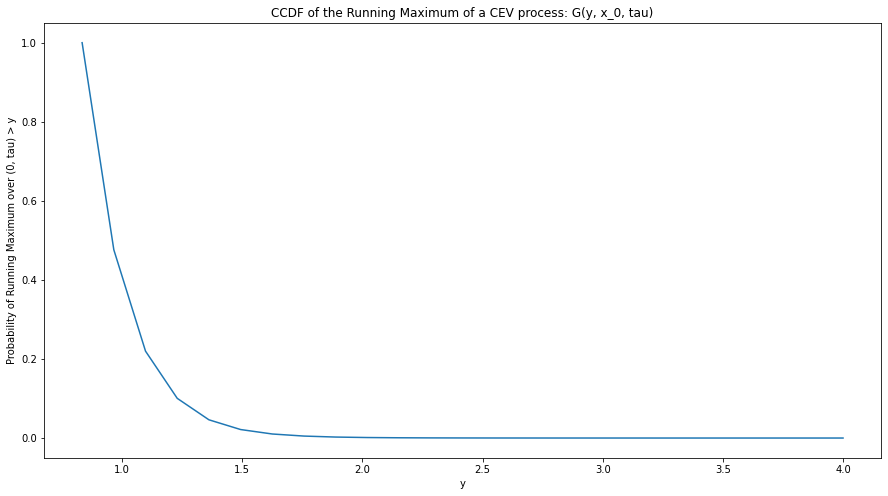

In [29]:
## Plot of the function G - CCDF of the Running Maximum

# Important to understanding its behavior and determining the upper limit for the integration !!!!
# In theory, the CCDF of the Running Maximum of J extends to +infinity, but in practice it decays very fast.
# For the integral, we use an Adaptative Gaussian Quadrature Alg. (scipy.integrate.quad)

# Lower Limit for plotting:
lowlim_plot = J_t

# Right limit for plotting
upplim_plot = 4

# Number of points used to plot the CCDF of the Running Maximum of J
n_points = 25

plot_CCDF_CEV_RuningMaximum (J_t, years, b, a, beta, lowlim_plot, upplim_plot, n_points)

In [30]:
## Price CEV-Dynamic Fund Protection - Numerical Calculation

# In theory, the CCDF of the Running Maximum of J extends to +infinity, but in practice it decays very fast.
# In practice, we choose an upper limit for the integral, based on how fast G goes to 0. 
# The choice of the upper limit can be made with help of the plot of G.

# Lower Limit for Integrating the CCDF:
lowlim_integ = M_t

# Upper Limit for Integrating the CCDF:
upplim_integ = 8

# Determine price of CEV-DFP
price_DFP = exp(-q*years)*S_t*(M_t - 1 + Integral_G(J_t, years, b, a, beta, lowlim_integ, upplim_integ))

print('Price of CEV Dynamic Fund Protection: ' +str(price_DFP))

Price of CEV Dynamic Fund Protection: 7.898379280426066
